### Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score


### Data collection and analysis

#### PIMA Diabetes Dataset

In [2]:
# loading the diabetes dataset to a panda dataframe
diabetes_dataset=pd.read_csv('diabetes.csv')

In [3]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# number of rows and columns in this dataset
diabetes_dataset.shape

(768, 9)

In [5]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### 0-Non Diabetic
#### 1-Diabetic

In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
# separating the data and labels
X=diabetes_dataset.drop(columns = 'Outcome',axis=1)
Y=diabetes_dataset['Outcome']

In [10]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [11]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Train Test Split

In [12]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [13]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


### Training the model

In [14]:
classifier=svm.SVC(kernel='linear')

In [15]:
# training the support vector Machine Classifier
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

### Model Evaluation

#### Accuracy Score

In [16]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [17]:
print("Accuracy score of training data=",training_data_accuracy)

Accuracy score of training data= 0.7833876221498371


In [18]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [19]:
print("Accuracy score of test data=",test_data_accuracy)

Accuracy score of test data= 0.7727272727272727


### Making a Predictive System

In [20]:
input_data=(3,158,76,36,245,31.6,0.851,28)
 
# changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the array as we are predicting for one instance
std_data= input_data_as_numpy_array.reshape(1,-1)


In [21]:
prediction=classifier.predict(std_data)
print(prediction)

if(prediction[0]==0): print('The person is non-diabetic')
else: print('The person is diabetic')

[1]
The person is diabetic


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### Using random forest classification

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

# accuracy score on the test data
rfc.predict(X_test)
print("Accuracy score of test data=",rfc.score(X_test,Y_test))

Accuracy score of test data= 0.7402597402597403


In [23]:
prediction2=rfc.predict(std_data)
print(prediction2)

if(prediction2[0]==0): print('The person is non-diabetic')
else: print('The person is diabetic')

[1]
The person is diabetic


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Using Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, Y_train)

# accuracy score on the test data
lr.predict(X_test)
print("Accuracy score of test data=",lr.score(X_test,Y_test))

Accuracy score of test data= 0.7597402597402597


In [25]:
prediction=lr.predict(std_data)
print(prediction)

if(prediction[0]==0): print('The person is non-diabetic')
else: print('The person is diabetic')

[1]
The person is diabetic


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## COMPARISON OF MODELS

### Using Train-Test Split

In [26]:
models=[svm.SVC(kernel='linear'),RandomForestClassifier(),LogisticRegression(max_iter=5000)]

In [27]:
def compare_model():
    for model in models:
        model.fit(X_train,Y_train)
        test_data_prediction=model.predict(X_test)
        accuracy=accuracy_score(Y_test,test_data_prediction)
        print("Accuracy score of the",model,"=",accuracy)

In [28]:
compare_model()

Accuracy score of the SVC(kernel='linear') = 0.7727272727272727
Accuracy score of the RandomForestClassifier() = 0.7467532467532467
Accuracy score of the LogisticRegression(max_iter=5000) = 0.7597402597402597


### Using Cross validation

In [29]:
models=[svm.SVC(kernel='linear'),RandomForestClassifier(),LogisticRegression(max_iter=5000)]
def compare_crossvalidation():
    for model in models:
        cv_score=cross_val_score(model,X,Y,cv=5)
        mean_accuracy=(sum(cv_score)/len(cv_score))*100
        mean_accuracy=round(mean_accuracy,3)
        print("\n\nFor the model-",model)
        print("\nCross validation accuracies= ",cv_score)
        print("\nAccuracy percentage= ",mean_accuracy,"%")

In [30]:
compare_crossvalidation()



For the model- SVC(kernel='linear')

Cross validation accuracies=  [0.75974026 0.75324675 0.74025974 0.81045752 0.76470588]

Accuracy percentage=  76.568 %


For the model- RandomForestClassifier()

Cross validation accuracies=  [0.75324675 0.73376623 0.75324675 0.81699346 0.77777778]

Accuracy percentage=  76.701 %


For the model- LogisticRegression(max_iter=5000)

Cross validation accuracies=  [0.77272727 0.74675325 0.75324675 0.81045752 0.77777778]

Accuracy percentage=  77.219 %


### Using Confusion matrix (heat map, precision, recall, specificity, sensitivity, f1 score)

In [31]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
import seaborn as sns
import matplotlib.pyplot as plt
def compare_model_cm(model):
    model.fit(X_train,Y_train)
    test_data_prediction=model.predict(X_test)
    cf_matrix=confusion_matrix(Y_test,test_data_prediction)
    print("\nFor the model-",model,"\nConfusion matrix:-\n",cf_matrix)
    fig,ax=plt.subplots(figsize=(4,3))
    sns.heatmap(cf_matrix,cmap="Pastel1",annot=True)
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Heat Map'); 
    ax.xaxis.set_ticklabels(['Not diabetic', 'Diabetic']); ax.yaxis.set_ticklabels(['Not diabetic','Diabetic']);
    plt.show()
    print("Precision score=",round((precision_score(Y_test,test_data_prediction)*100),3),"%")
    print("Recall score=",round((recall_score(Y_test,test_data_prediction)*100),3),"%")
    print("F1 score=",round((f1_score(Y_test,test_data_prediction)*100),3),"%")
    sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
    specificity = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
    print('Sensitivity=',round((sensitivity*100),2),"%")
    print('Specificity=',round((specificity*100),2),"%")
    


For the model- SVC(kernel='linear') 
Confusion matrix:-
 [[91  9]
 [26 28]]


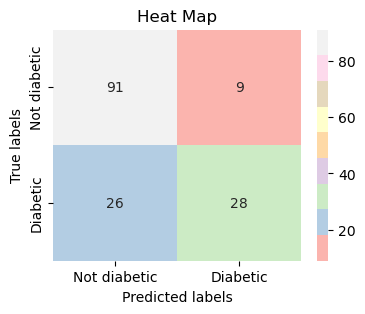

Precision score= 75.676 %
Recall score= 51.852 %
F1 score= 61.538 %
Sensitivity= 91.0 %
Specificity= 51.85 %


In [32]:
compare_model_cm(svm.SVC(kernel='linear'))


For the model- RandomForestClassifier() 
Confusion matrix:-
 [[84 16]
 [27 27]]


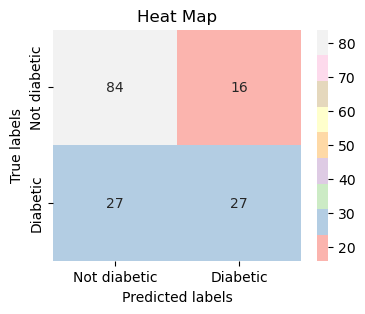

Precision score= 62.791 %
Recall score= 50.0 %
F1 score= 55.67 %
Sensitivity= 84.0 %
Specificity= 50.0 %


In [33]:
compare_model_cm(RandomForestClassifier())


For the model- LogisticRegression(max_iter=5000) 
Confusion matrix:-
 [[89 11]
 [26 28]]


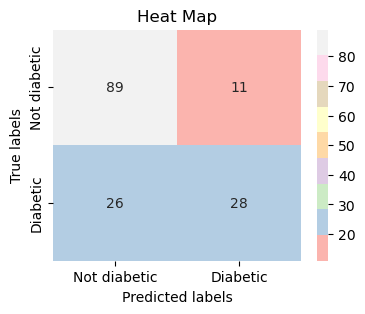

Precision score= 71.795 %
Recall score= 51.852 %
F1 score= 60.215 %
Sensitivity= 89.0 %
Specificity= 51.85 %


In [34]:
compare_model_cm(LogisticRegression(max_iter=5000))

## Correlation matrix

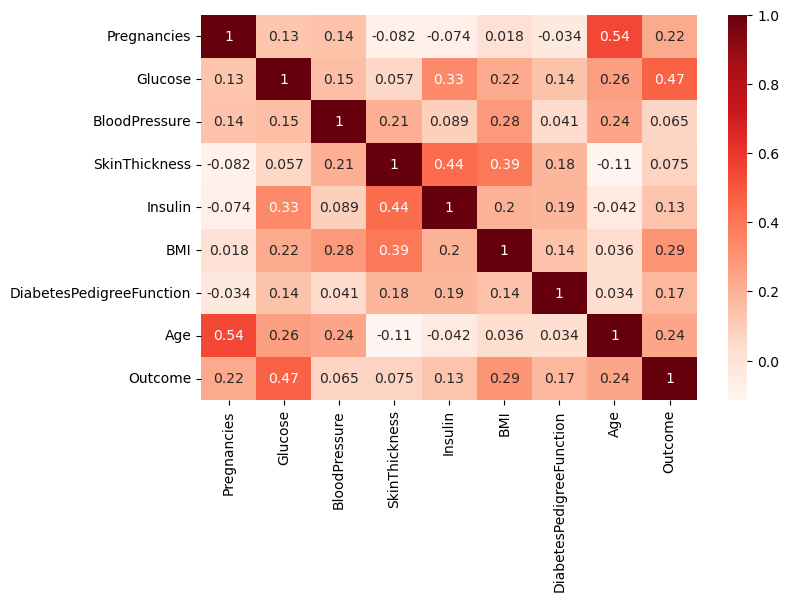

In [35]:
plt.figure(figsize=(8,5))
cor = diabetes_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Saving the model

In [36]:
import pickle
#saving the sav files of the models
filename1="trained_classifier.sav"
filename2="trained_forest.sav"
filename3="trained_logistic.sav"
pickle.dump(classifier,open(filename1,"wb"))
pickle.dump(rfc,open(filename2,"wb"))
pickle.dump(lr,open(filename3,"wb"))

In [43]:
#loading the saved sav files to predict sample
loaded_classifier=pickle.load(open(filename1,"rb"))
loaded_forest=pickle.load(open(filename2,"rb"))
loaded_logistic=pickle.load(open(filename3,"rb"))

loaded_models=[loaded_classifier,loaded_forest,loaded_logistic]

input_data=np.array([2,130,96,0,0,22.6,0.268,2])
input_data=input_data.reshape(1,-1)


for i in loaded_models:
    print(i,end="predicts: ")
    prediction=i.predict(input_data)
    if(prediction[0]==1): print("Diabetic")
    else: print("Non-Diabetic")

SVC(kernel='linear')predicts: Non-Diabetic
RandomForestClassifier()predicts: Non-Diabetic
LogisticRegression(max_iter=5000)predicts: Non-Diabetic


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Rough work

In [38]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
diabetes_dataset.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [40]:
diabetes_dataset.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64